In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from acceptance import *
from division_aware import *
import os

In [10]:
%%time
graph = Graph.from_json("shapes/wisconsin2020_graph_cousub.json")
munis, nodes_by_muni = get_divisions(graph, "COUSUB")
counties, nodes_by_county = get_divisions(graph, "COUNTYFP")
elections = ["GOV12", "SEN12", "PRES12", "GOV14", "SEN16", "PRES16", "GOV18", "SEN18"]

CPU times: user 11.8 s, sys: 78 ms, total: 11.9 s
Wall time: 11.9 s


In [11]:
partition = make_partition_from_districtr_csv("WI", graph, "true_D_0.05_100000_best")

In [101]:
def get_seat_shares(partition, elections):
    return [partition[election].wins("Rep") / len(partition) for election in elections]

def get_vote_shares(partition, election):
    return [partition[election].percent("Rep") for election in elections]

def plot_sv_elections(run, elections):
    partition = make_partition_from_districtr_csv("WI", graph, run)
    seat_shares = get_seat_shares(partition, elections)
    vote_shares = get_vote_shares(partition, elections)
    
    fig, ax = plt.subplots(figsize=(12, 4))
    
    ax.plot(vote_shares,
            label="GOP Vote Share",
            marker='o',
           )
    ax.plot(seat_shares,
            label="GOP Seat Share",
            marker='o',
           )
#     ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels([""] + elections)
    
    
    plt.ylim(0,1)
    plt.legend()
    plt.title(run)
    plt.show()
    return

def plot_many_seats(plans, elections, title):
    vote_shares = get_vote_shares(make_partition_from_districtr_csv("WI", graph, plans[0]), elections)
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(vote_shares,
            marker='o',
            lw=5,
            label='GOP Vote Share',
           )
    for plan in plans:
        partition = make_partition_from_districtr_csv("WI", graph, plan)
        seat_shares = get_seat_shares(partition, elections)
        P2_score = P2(partition, elections)
        ax.plot(seat_shares,
                marker='o',
                linestyle='--',
                label=f'{plan} seat share ({P2_score:0.3f})')
        
    ax.set_xticklabels([""] + elections)
    
    plt.ylim(0, 0.8)
    plt.legend()
    plt.xlabel("Election", fontsize=24)
    plt.ylabel("GOP Share", fontsize=24)
    plt.title(title, fontsize=24)
    plt.show()
    return

In [102]:
aware_plans = [
    "WI_enacted",
    "true_P1_0.02_100000_best",
    "true_P2_0.02_100000_best",
    "true_D_0.02_100000_best",
]

unaware_plans = [
    "WI_enacted",
    "false_P1_0.02_100000_best",
    "false_P2_0.02_100000_best",
    "false_D_0.02_100000_best",
]

<ipython-input-101-85cb05d9fa8a>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + elections)


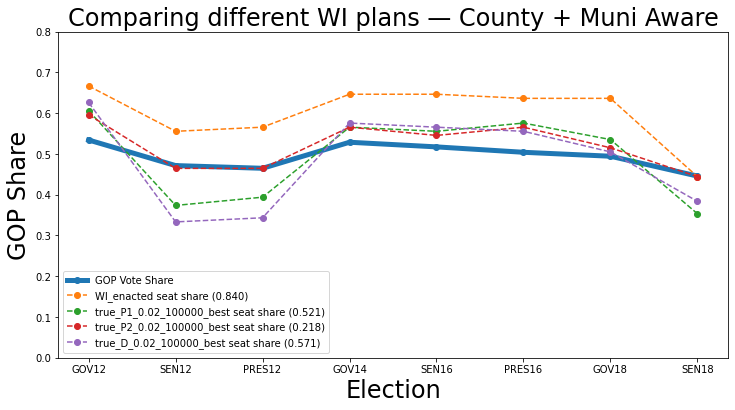

In [103]:
plot_many_seats(aware_plans, elections, "Comparing different WI plans — County + Muni Aware")

<ipython-input-101-85cb05d9fa8a>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + elections)


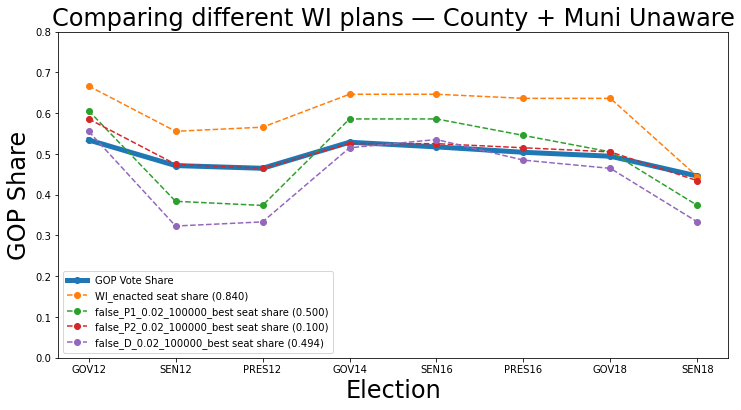

In [104]:
plot_many_seats(unaware_plans, elections, "Comparing different WI plans — County + Muni Unaware")

<ipython-input-44-d0b8f8f16137>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + elections)


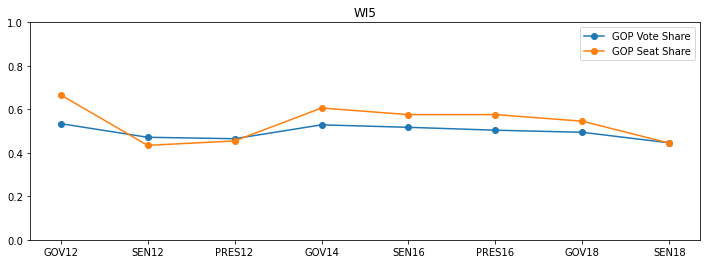

In [53]:
plot_sv_elections("WI5", elections)

<ipython-input-44-d0b8f8f16137>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + elections)


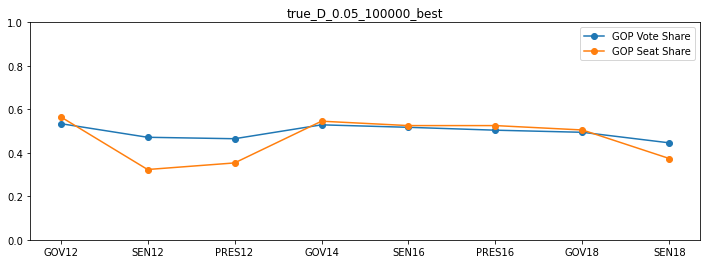

In [45]:
plot_sv_elections("true_D_0.05_100000_best", elections)

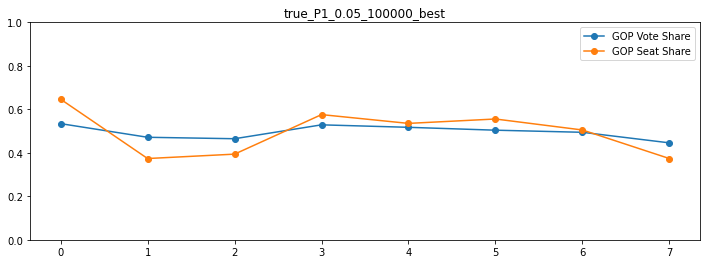

In [31]:
plot_sv_elections("true_P1_0.05_100000_best", elections)

<ipython-input-44-d0b8f8f16137>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + elections)


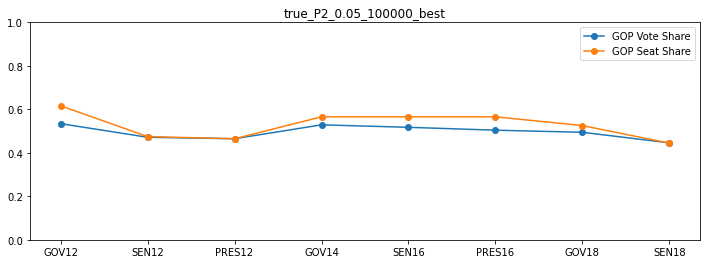

In [54]:
plot_sv_elections("true_P2_0.05_100000_best", elections)

<ipython-input-44-d0b8f8f16137>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + elections)


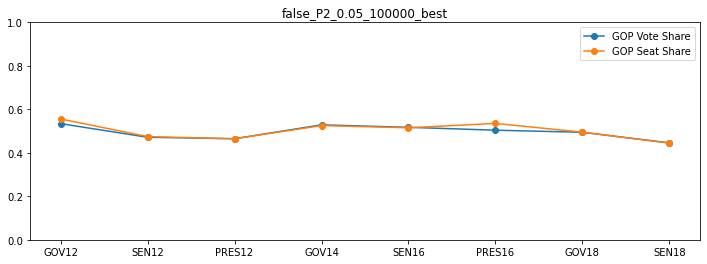

In [55]:
plot_sv_elections("false_P2_0.05_100000_best", elections)

In [9]:
get_vote_shares(partition, elections)

[0.49442085121913604,
 0.4458143749771898,
 0.5040798903802971,
 0.51733399444859,
 0.5287097987271241,
 0.4648361759566266,
 0.47147849673582193,
 0.5342201102771328]

In [7]:
get_seat_shares(partition, elections)

[0.5050505050505051,
 0.37373737373737376,
 0.5252525252525253,
 0.5252525252525253,
 0.5454545454545454,
 0.35353535353535354,
 0.32323232323232326,
 0.5656565656565656]

In [83]:
# def get_stats(partition):
#     print(f"Split Counties: {num_division_splits(graph, partition, counties, nodes_by_county, division_col='COUNTYFP')}")
#     print(f"Split Munis: {num_division_splits(graph, partition, munis, nodes_by_muni, division_col='COUSUB')}")
#     print(f"GOP %: {D(partition, elections):0.3f}")
#     print(f"P1: {P1(partition, elections):0.3f}")
#     print(f"P2: {P2(partition, elections):0.3f}")

In [6]:
os.listdir("pmc_assignments/")

['false_P1_0.05_100000_best.csv',
 'true_P1_0.02_100000_best.csv',
 'true_P1_0.05_100000_best.csv',
 '.DS_Store',
 'false_P1_0.02_100000_best.csv',
 'false_D_0.02_100000_best.csv',
 'false_D_0.05_100000_best.csv',
 'false_P2_0.02_100000_best.csv',
 'true_D_0.05_100000_best.csv',
 'true_P2_0.05_100000_best.csv',
 'true_P2_0.02_100000_best.csv',
 'true_D_0.02_100000_best.csv',
 'false_P2_0.05_100000_best.csv']

In [7]:
print("Run, Split Counties, Split Munis, GOP %, P1, P2")
for run in os.listdir("pmc_assignments/"):
    run = run[:-4]
    try:
        partition = make_partition_from_districtr_csv("WI", graph, run)
    except:
        continue
    split_counties = num_division_splits(graph, partition, counties, nodes_by_county, division_col='COUNTYFP')
    split_munis = num_division_splits(graph, partition, munis, nodes_by_muni, division_col='COUSUB')
    gop = D(partition, elections)
    p1 = P1(partition, elections)
    p2 = P2(partition, elections)
    print(f"{run}, {split_counties}, {split_munis}, {gop}, {p1}, {p2}")

Run, Split Counties, Split Munis, GOP %, P1, P2
false_P1_0.05_100000_best, 62, 278, 0.494949494949495, 0.00016221664074483888, 0.4397280389809947
true_P1_0.02_100000_best, 38, 74, 0.494949494949495, 0.00016221664074483888, 0.5205361197890755
true_P1_0.05_100000_best, 39, 62, 0.494949494949495, 0.00016221664074483888, 0.4801320793850352
false_P1_0.02_100000_best, 67, 247, 0.494949494949495, 0.00016221664074483888, 0.5003340995870553
false_D_0.02_100000_best, 67, 284, 0.4431818181818182, 0.051929893408421635, 0.4941491196341092
false_D_0.05_100000_best, 67, 302, 0.44191919191919193, 0.05319251967104788, 0.44800902772320816
false_P2_0.02_100000_best, 62, 276, 0.5037878787878788, 0.008676167197638973, 0.09964518841814446
true_D_0.05_100000_best, 41, 64, 0.46464646464646464, 0.03046524694377517, 0.4195260187789745
true_P2_0.05_100000_best, 41, 60, 0.5277777777777778, 0.03266606618753798, 0.2644478131861185
true_P2_0.02_100000_best, 40, 60, 0.5202020202020202, 0.02509030861178041, 0.21750581

In [85]:
partition = make_partition_from_districtr_csv("WI", graph, "true_D_0.05_100000_best")
get_stats(partition)

Split Counties: 41
Split Munis: 64
GOP %: 0.465
P1: 0.030
P2: 0.420


In [64]:
def set_up_fig():
    fig, ax = plt.subplots(5, 2, figsize=(48,32))
    return ax

def annotate_plot(ax, title):
    for j, stat in enumerate(["split_counties", "split_munis", "Ds", "P1s", "P2s"]):
        ax[j][0].set_title(f"{stat} (Traceplot)", fontsize=24)
        ax[j][1].set_title(f"{stat} (Histogram)", fontsize=24)
    ax[0][0].legend()
    plt.suptitle(title, fontsize=32)
    plt.show()
    return

def plot_run(ax, optimizer, comparison):
    alpha = 0.7
    
    if comparison == "awareness":
        df1 = pd.read_csv(f"pmc_outputs/true_{optimizer}_0.05_100000.csv")
        df2 = pd.read_csv(f"pmc_outputs/false_{optimizer}_0.05_100000.csv")
        labels = ["Aware", "Non-Aware"]
    elif comparison == "pop-balance":
        df1 = pd.read_csv(f"pmc_outputs/true_{optimizer}_0.05_100000.csv")
        df2 = pd.read_csv(f"pmc_outputs/true_{optimizer}_0.02_100000.csv")
        labels = ["5%", "2%"]
    
    for i, df in enumerate([df1, df2]):
        for j, stat in enumerate(["split_counties", "split_munis", "Ds", "P1s", "P2s"]):
            ax[j][0].plot(df[stat],
                          label=labels[i],
                          alpha=alpha,
                         )
            ax[j][1].hist(df[stat],
                          label=labels[i],
                          bins=20,
                          alpha=alpha,
                         )
            
def plot_everything(optimizer, comparison):
    ax = set_up_fig()
    plot_run(ax, optimizer, comparison)
    annotate_plot(ax, f"Optimizing {optimizer}")

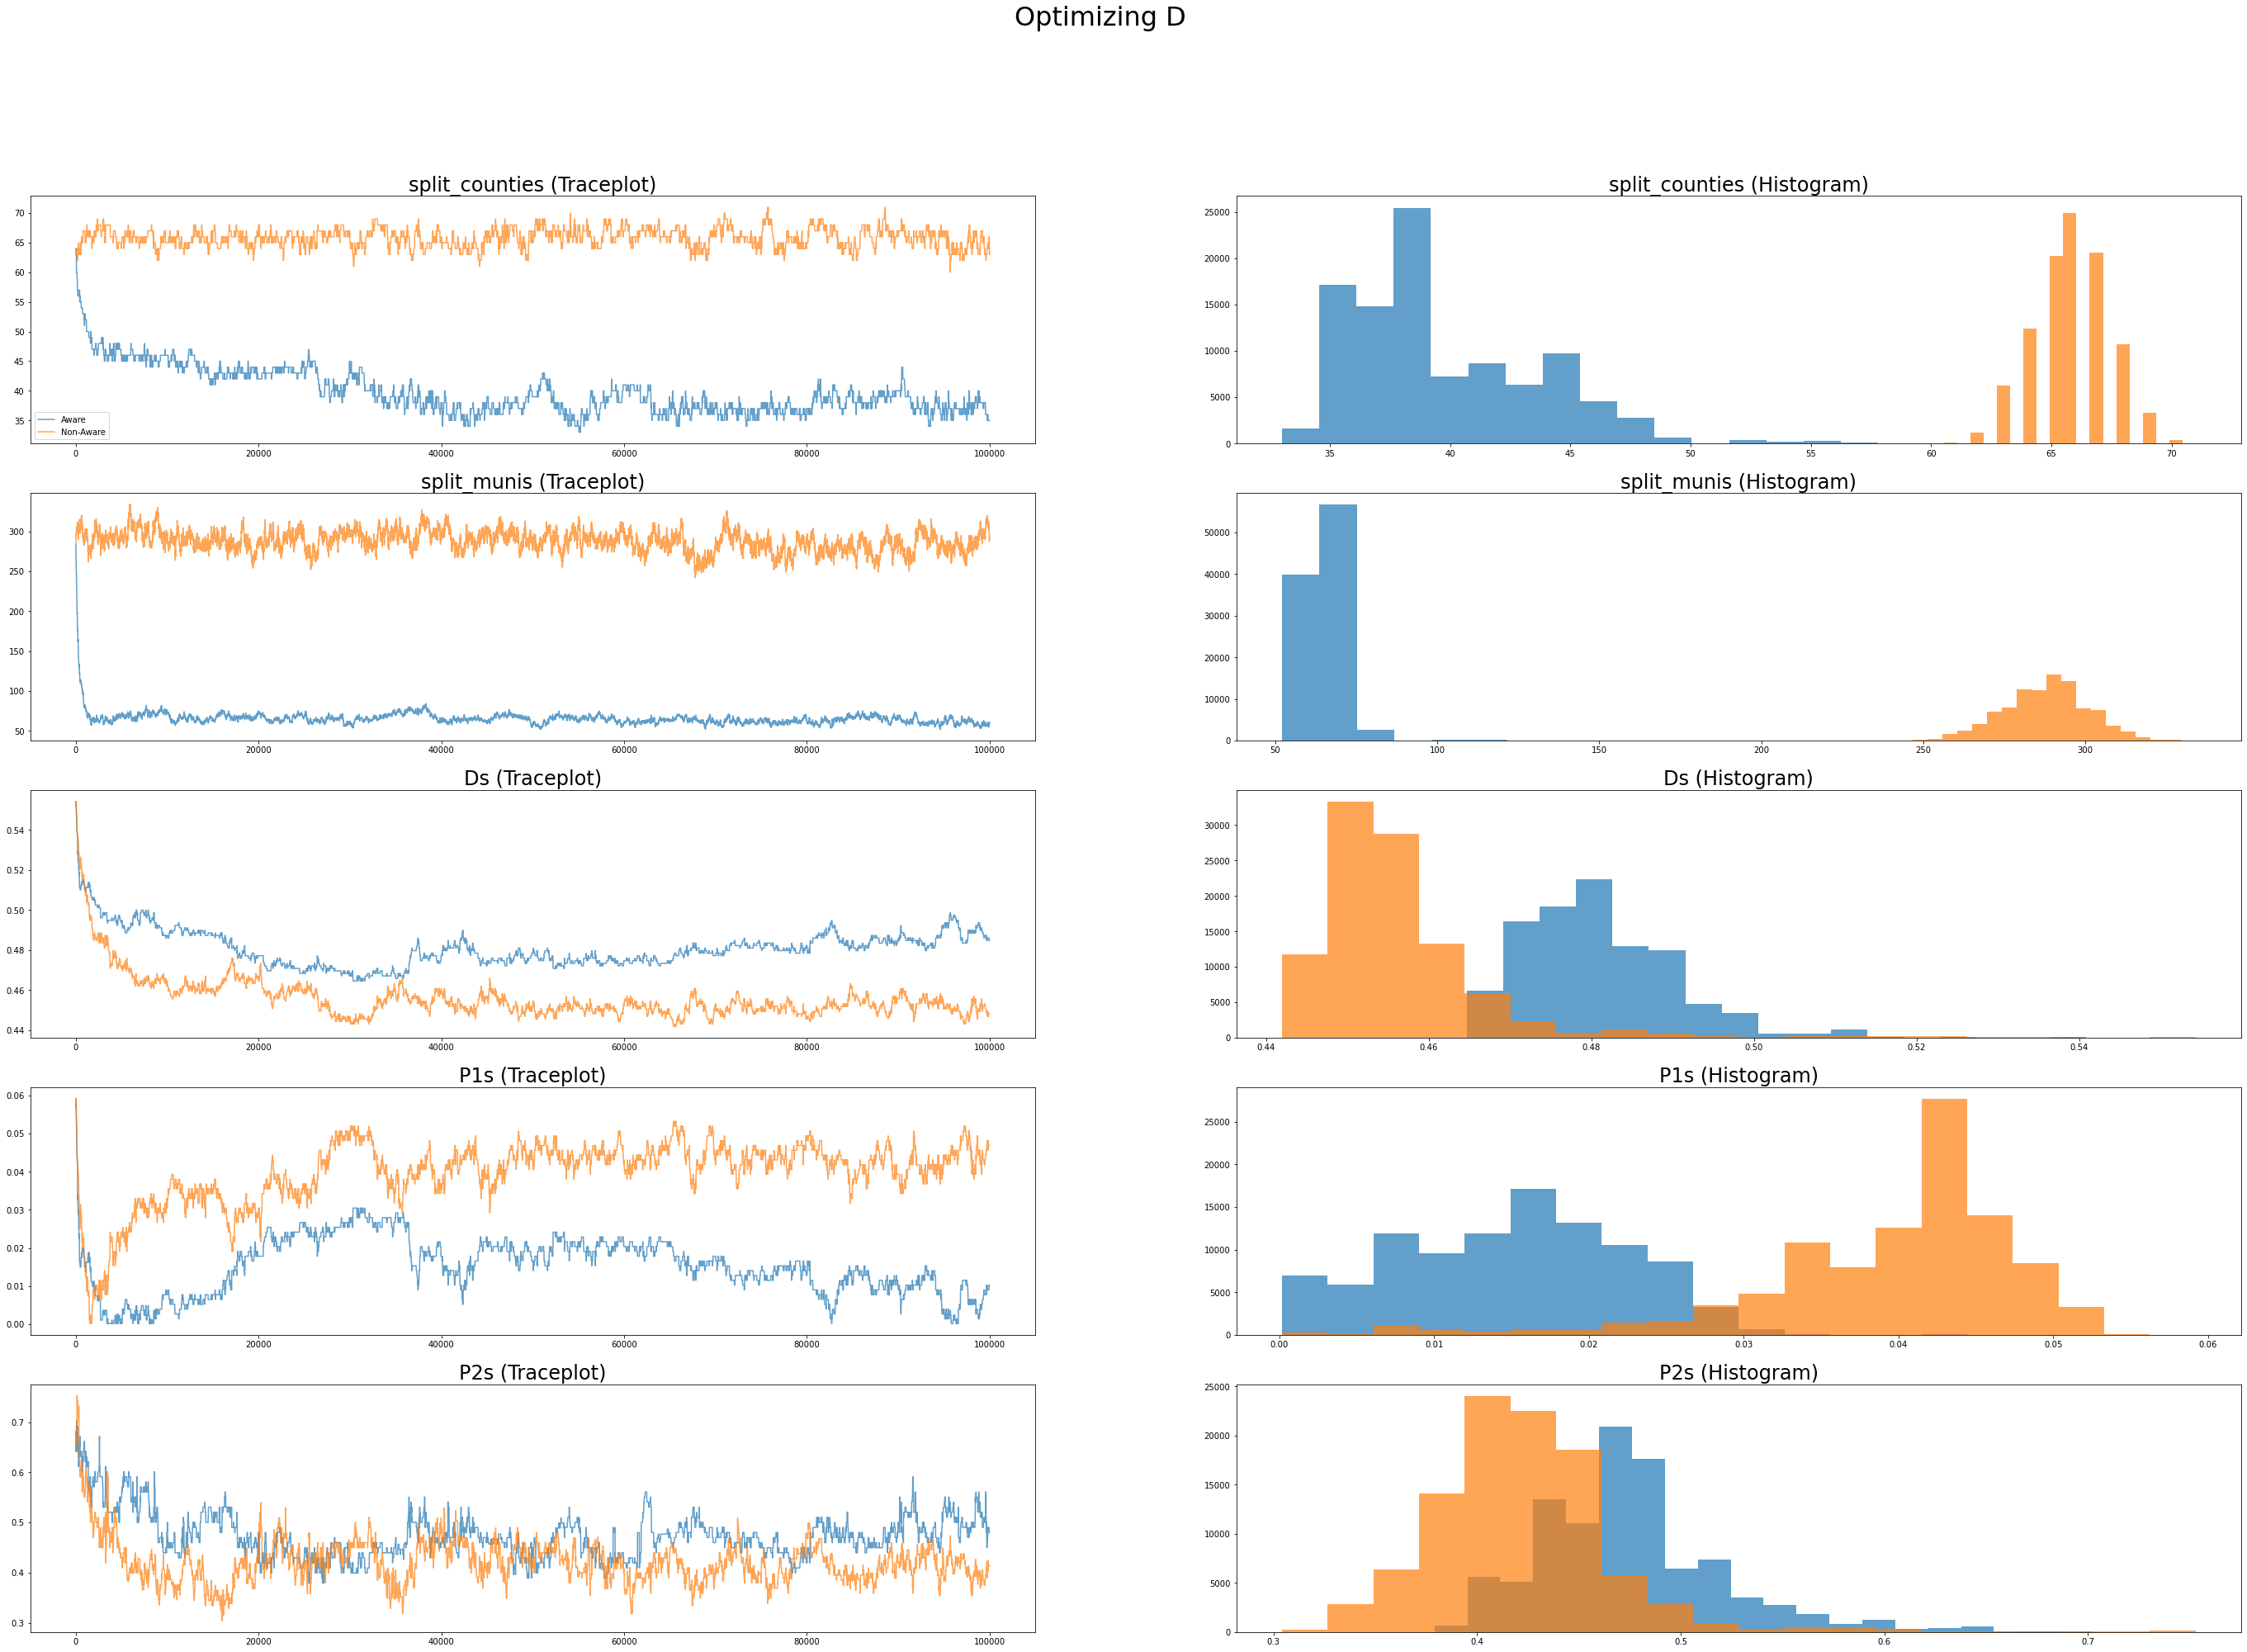

In [66]:
plot_everything("D", "awareness")

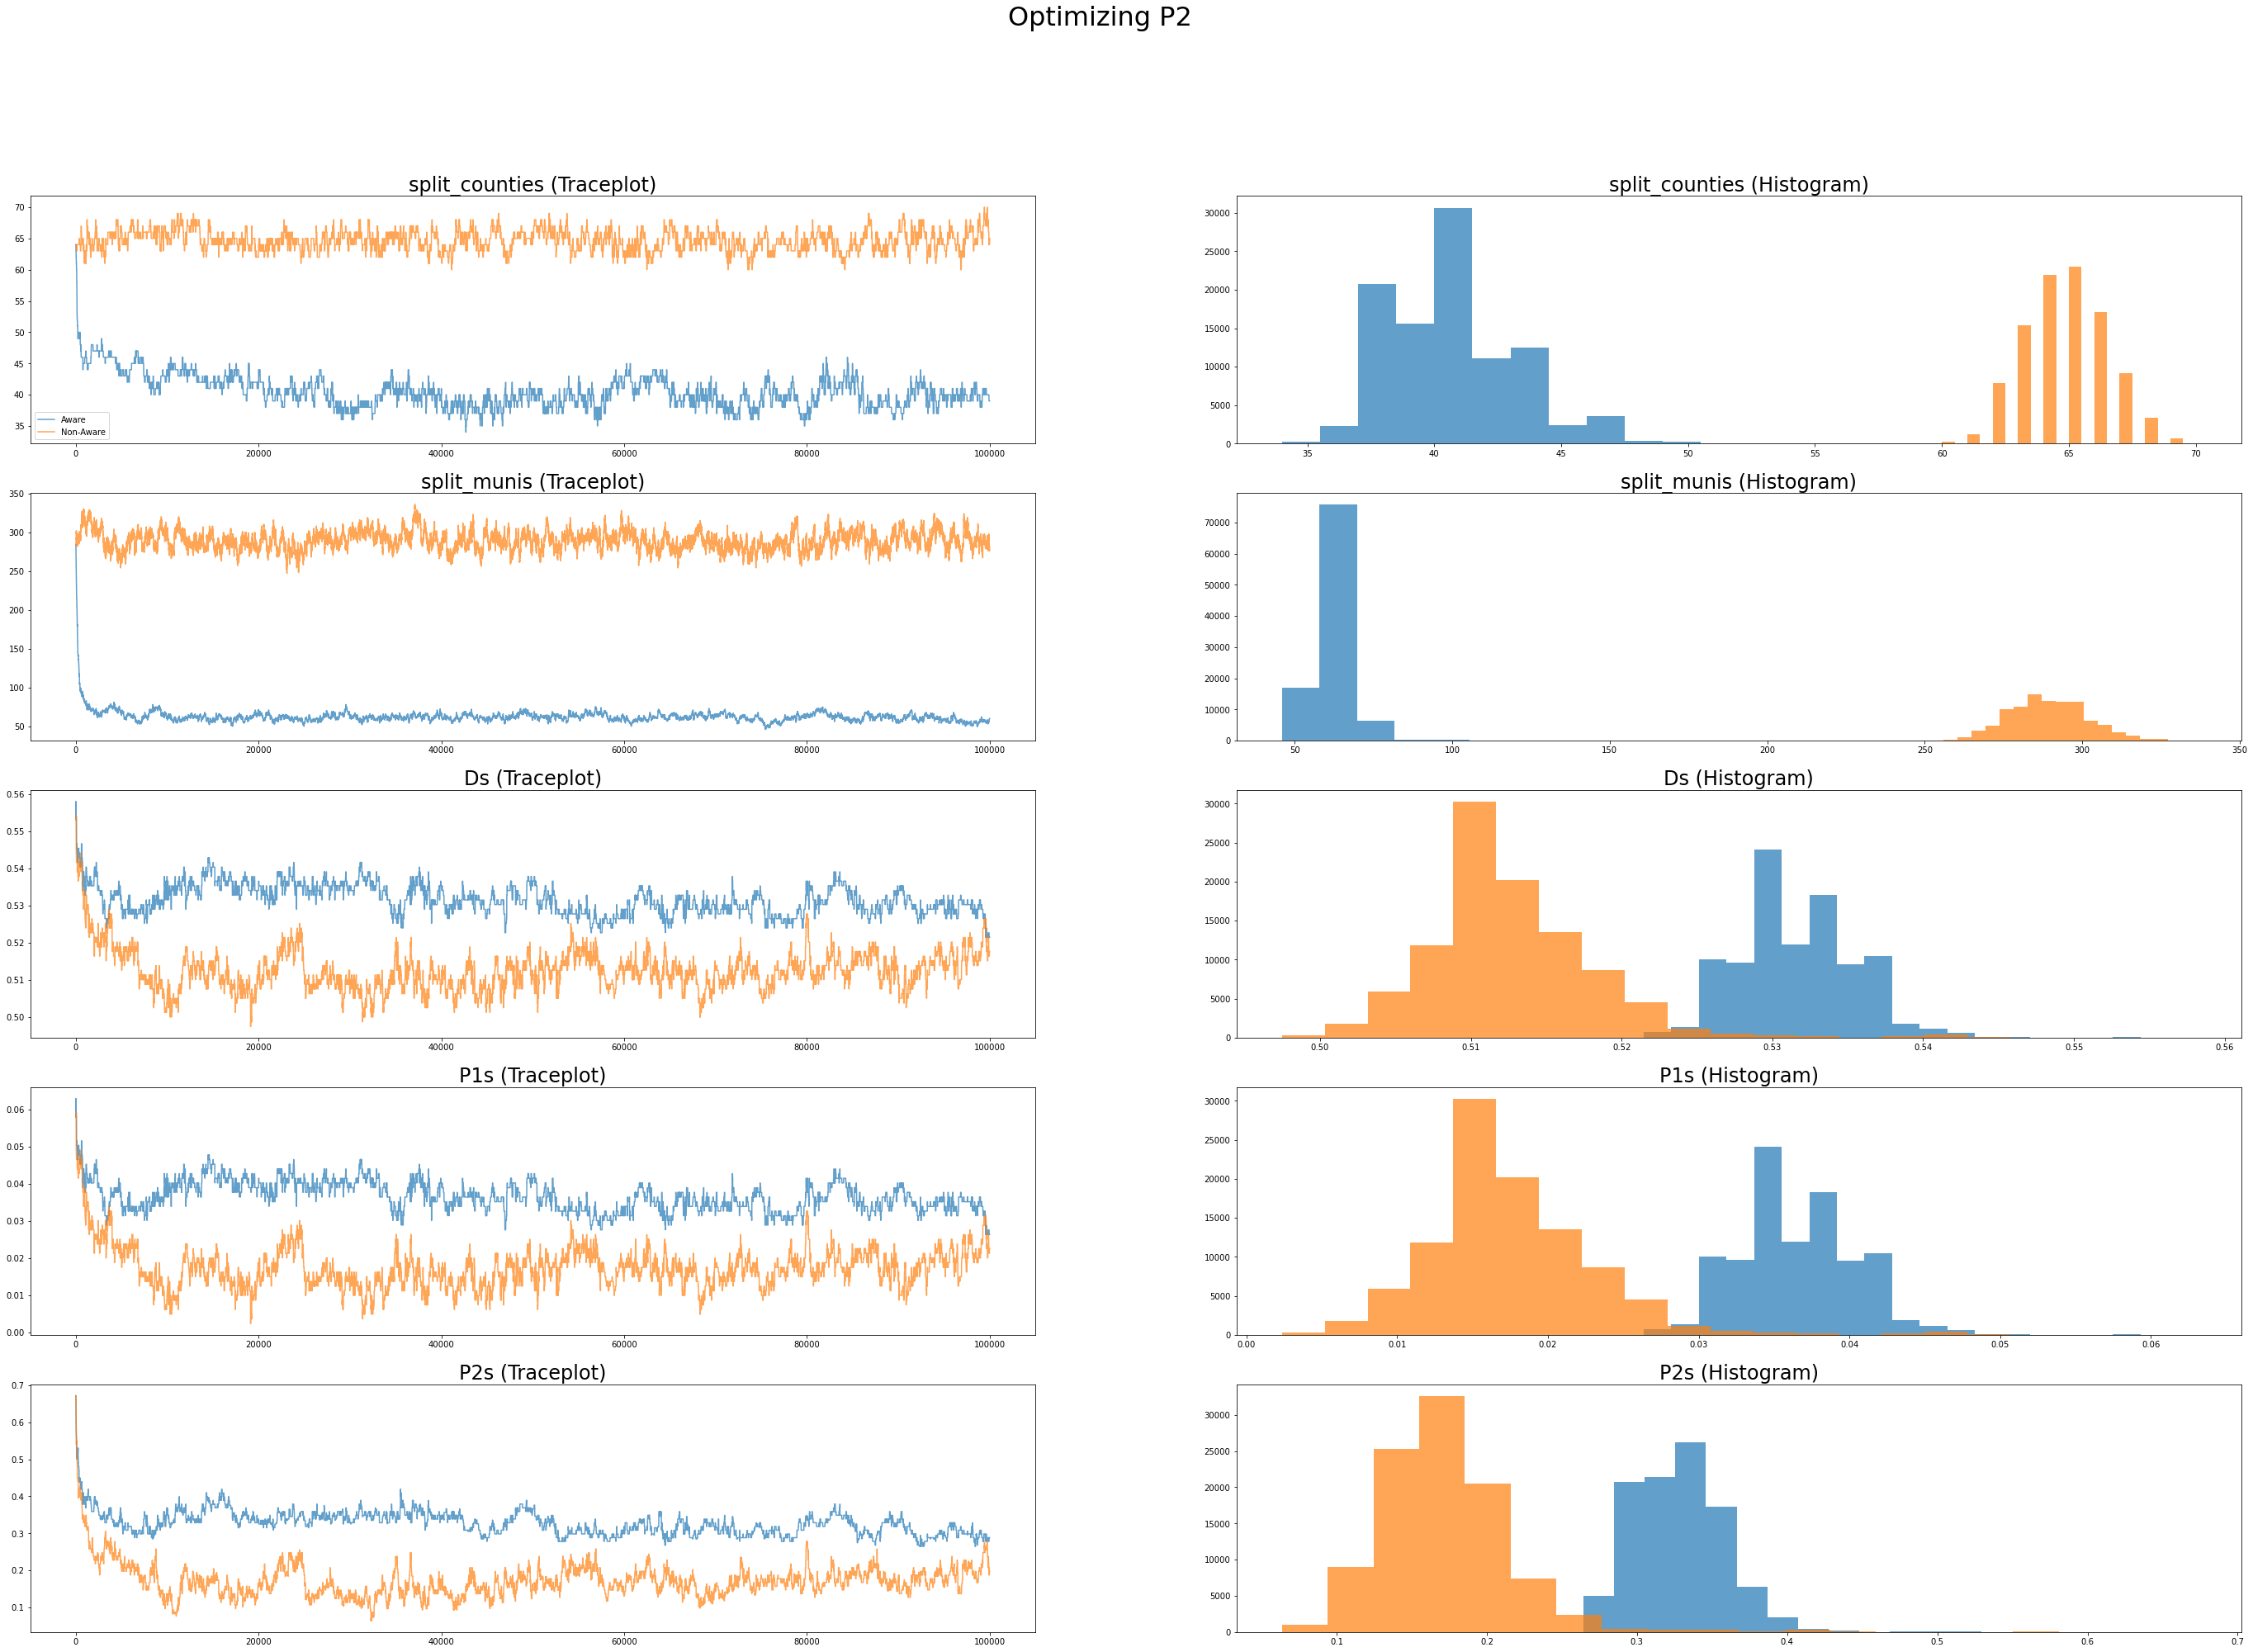

In [88]:
plot_everything("P2", "awareness")

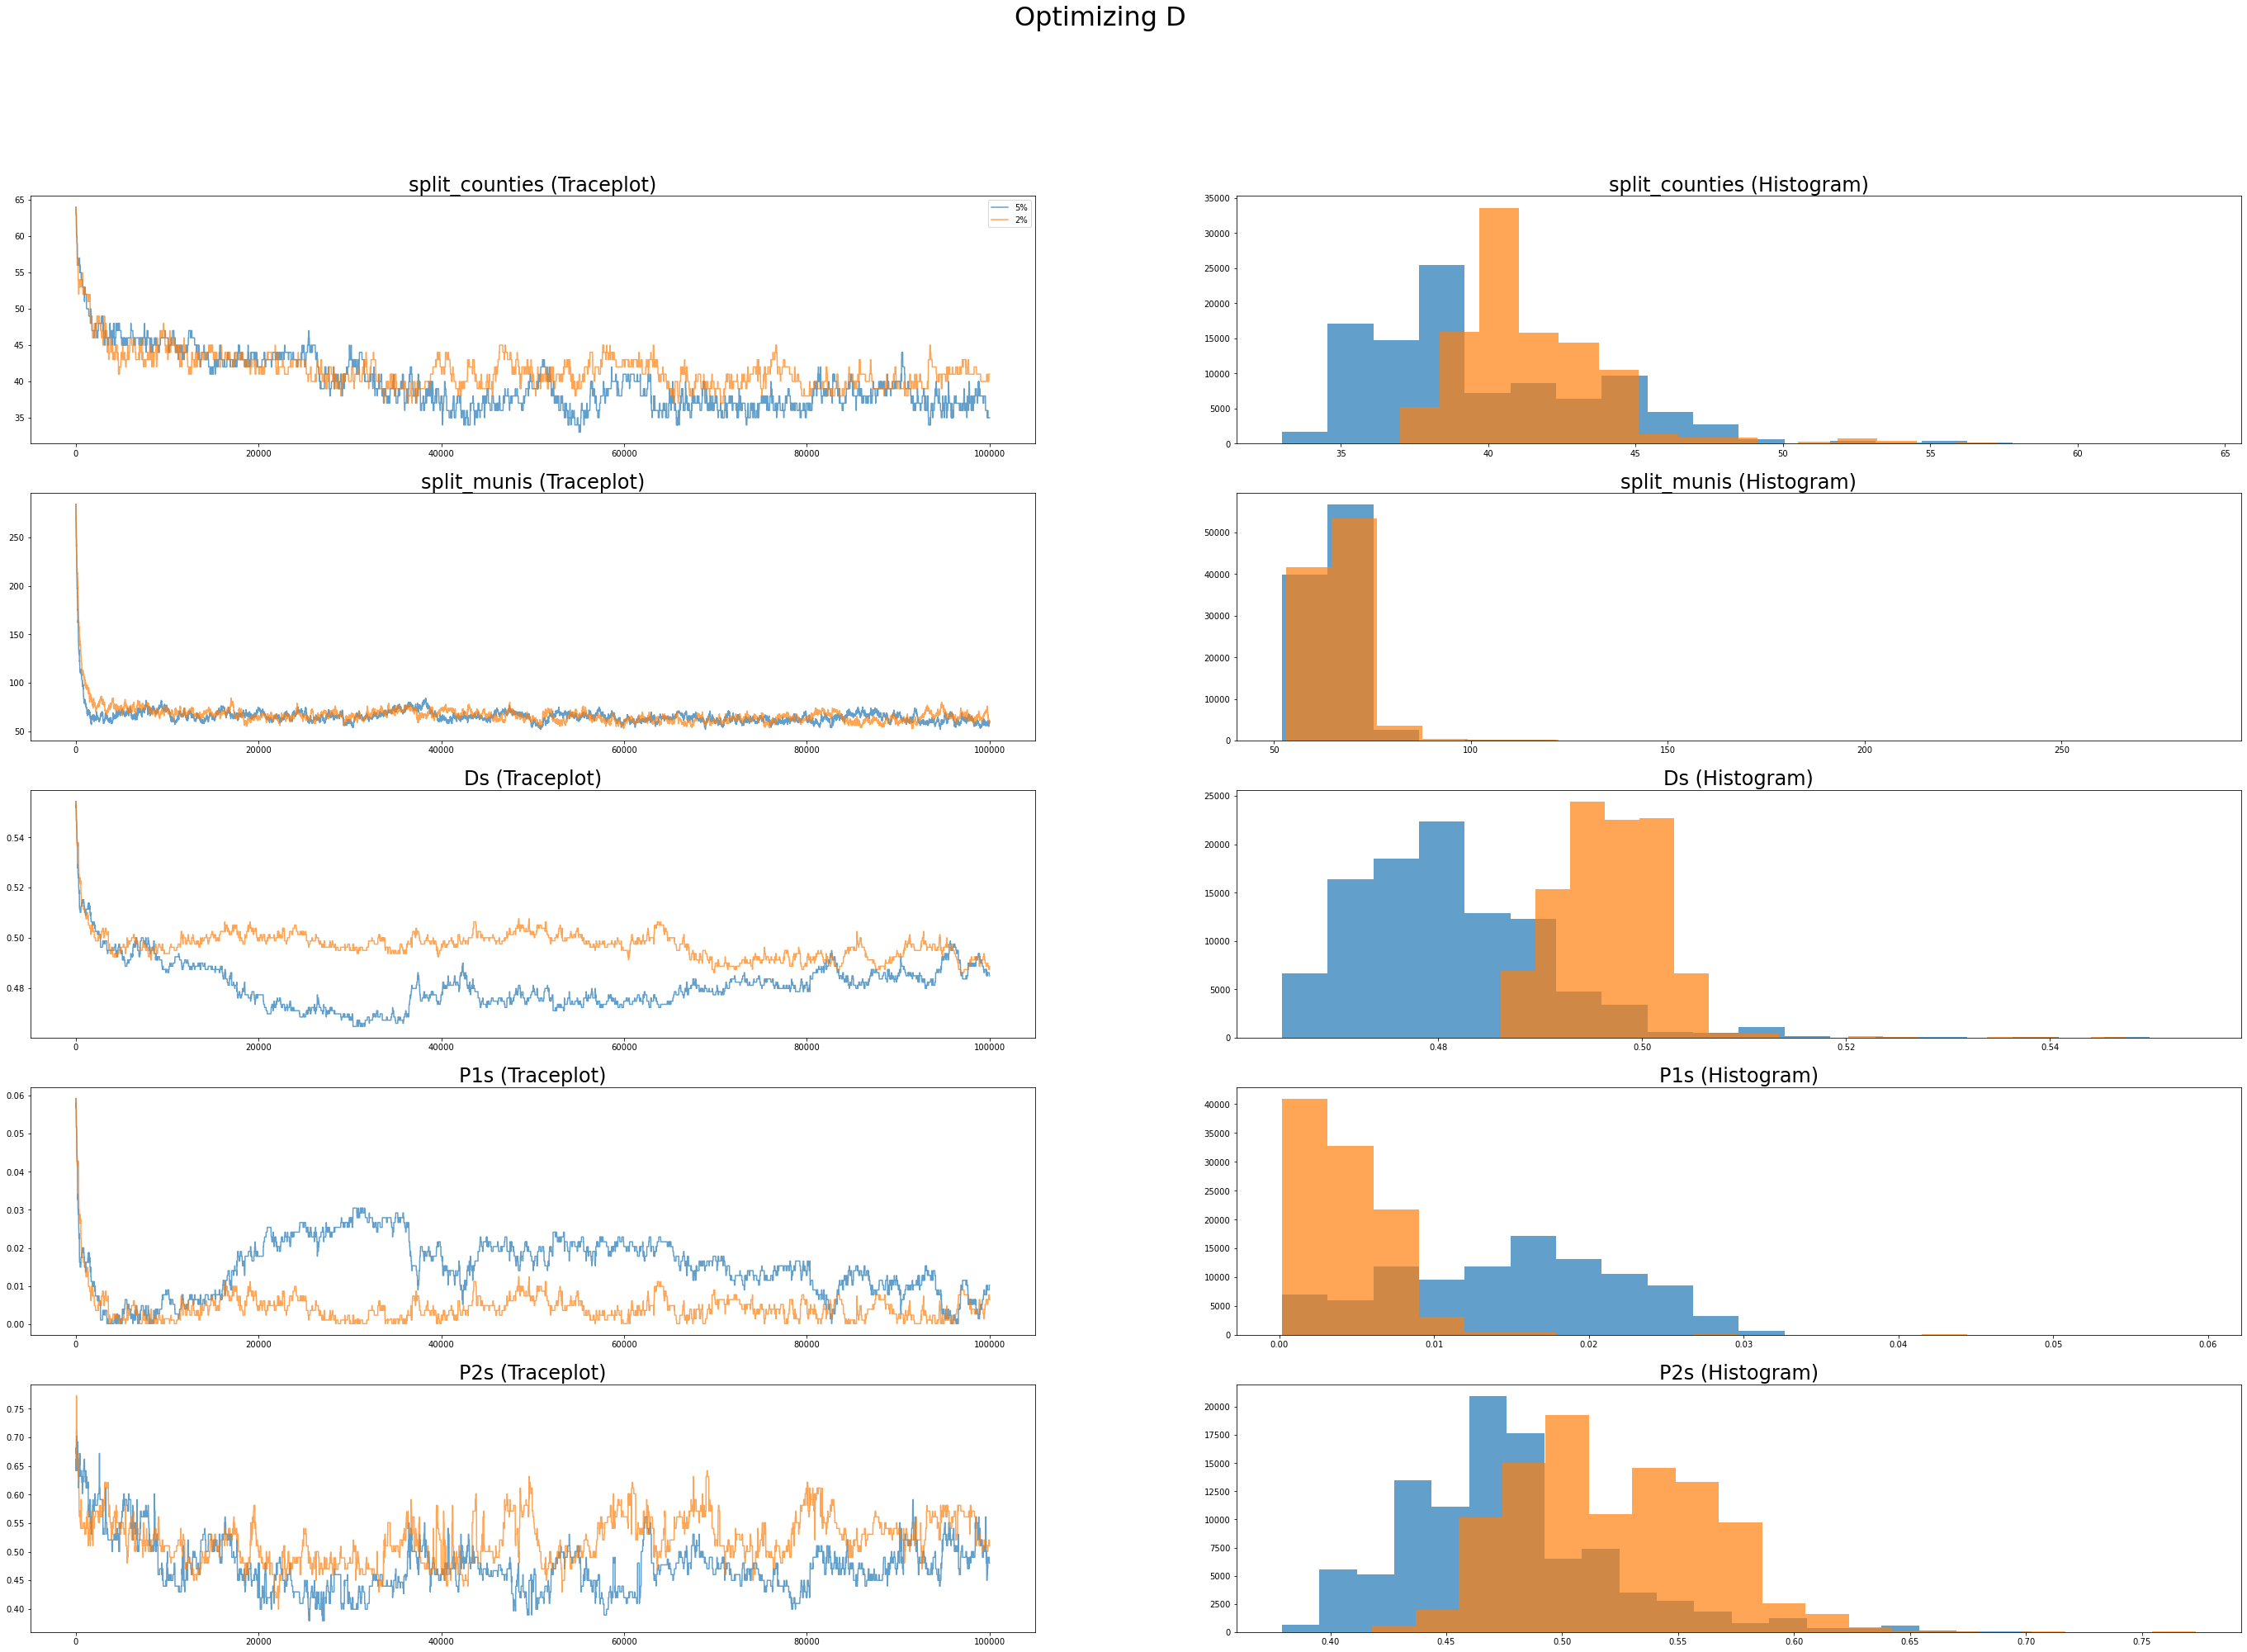

In [68]:
plot_everything("D", "pop-balance")

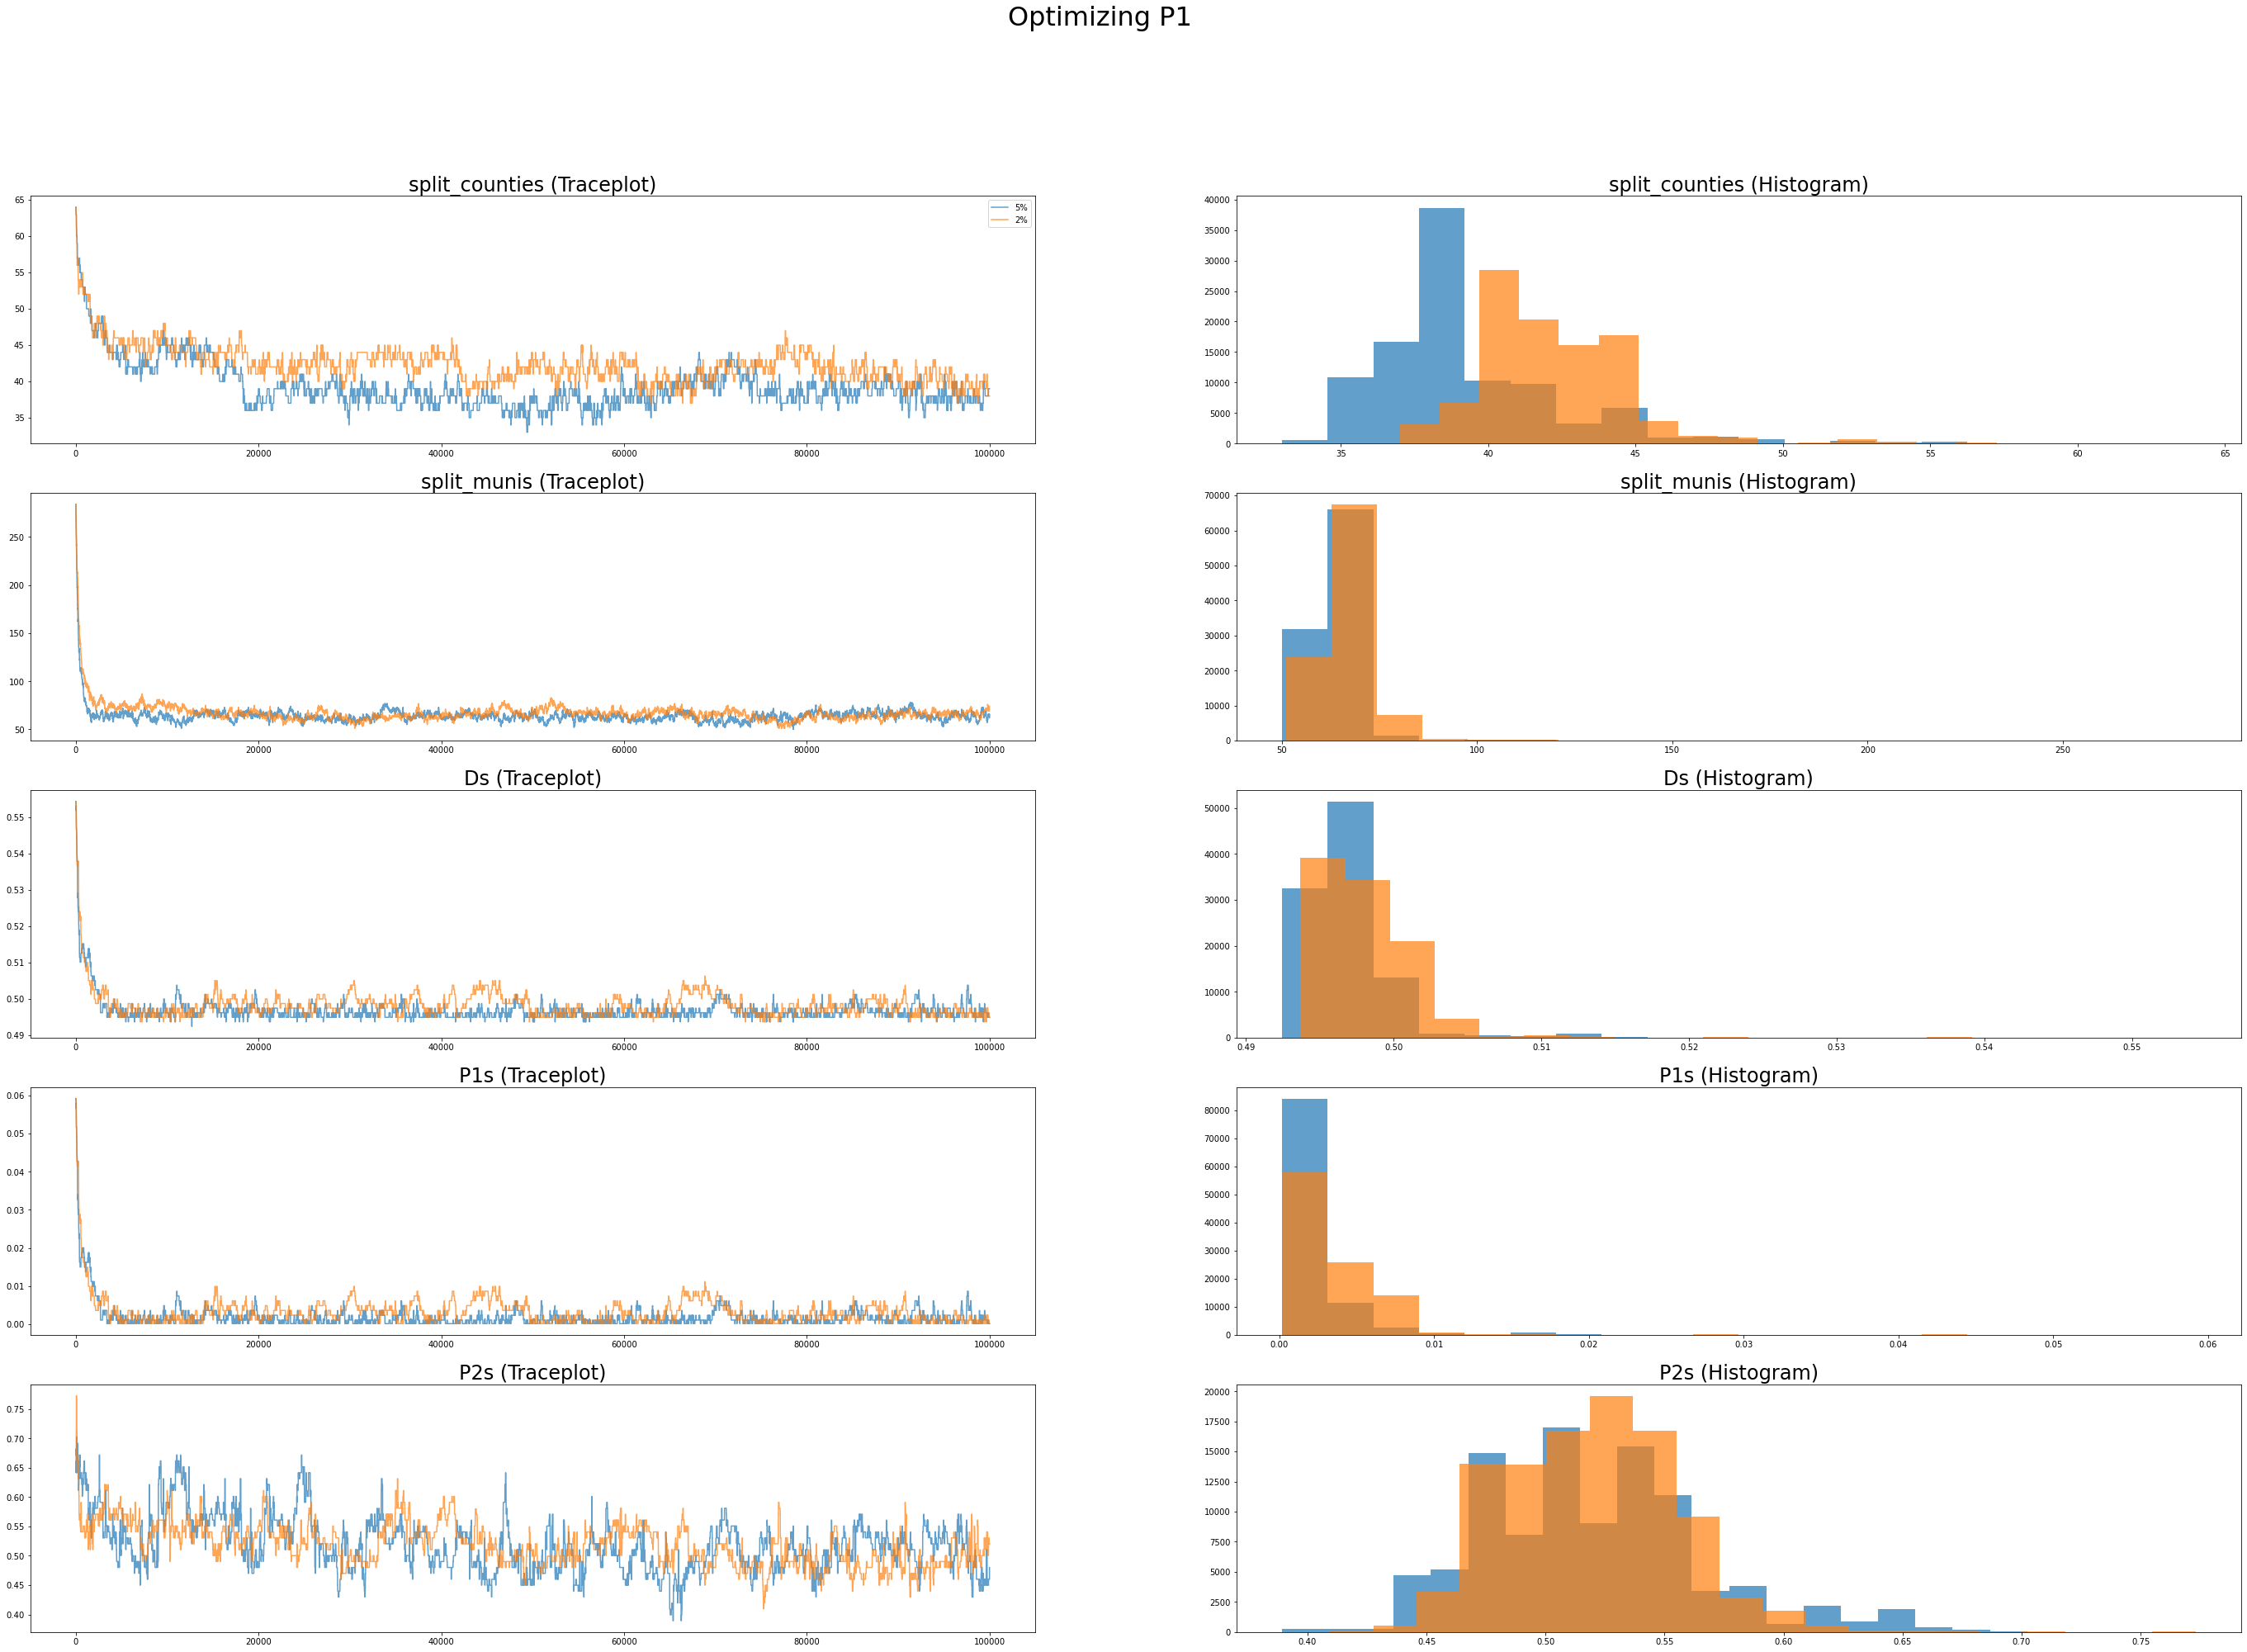

In [87]:
plot_everything("P1", "pop-balance")